In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
url_players <- "https://raw.github.students.cs.ubc.ca/fpettit/Project-Planning-Stage/main/players.csv?token=GHSAT0AAAAAAAAAIIVFBWAXAYW34RTD6QDGZ67RXZA"
url_sessions <- "https://raw.github.students.cs.ubc.ca/fpettit/Project-Planning-Stage/main/sessions.csv?token=GHSAT0AAAAAAAAAIIVFHA2PKPLSEMPQTNYYZ67RYDQ"

In [3]:
players_data <- read_csv(url_players)
sessions_data <- read_csv(url_sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
players_data

summary_mean_played_hours <- players_data |> 
                            summarize(mean = mean(played_hours, na.rm = TRUE))
summary_sd_played_hours <- players_data |> 
                            summarize(sd = sd(played_hours, na.rm = TRUE))
summary_min_played_hours <- players_data |> 
                            summarize(min = min(played_hours, na.rm = TRUE))
summary_max_played_hours <- players_data |> 
                            summarize(max = max(played_hours, na.rm = TRUE))
summary_median_played_hours <- players_data |> 
                            summarize(median = median(played_hours, na.rm = TRUE))

summary_mean_age <- players_data |> 
                    summarize(mean = mean(Age, na.rm = TRUE))
summary_sd_age <- players_data |> 
                    summarize(sd = sd(Age, na.rm = TRUE))
summary_min_age <- players_data |> 
                    summarize(min = min(Age, na.rm = TRUE))
summary_max_age <- players_data |> 
                    summarize(max = max(Age, na.rm = TRUE))
summary_median_age <- players_data |> 
                    summarize(median = median(Age, na.rm = TRUE))

missing_values_players <- players_data |> 
                          summarize(across(everything(), ~ sum(is.na(.))))


print("played_hours stats")

summary_mean_played_hours
summary_sd_played_hours
summary_min_played_hours
summary_max_played_hours
summary_median_played_hours

print("age stats")

summary_mean_age
summary_sd_age
summary_min_age
summary_max_age
summary_median_age

print("missing_values")

missing_values_players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


[1] "played_hours stats"


mean
<dbl>
5.845918


sd
<dbl>
28.35734


min
<dbl>
0


max
<dbl>
223.1


median
<dbl>
0.1


[1] "age stats"


mean
<dbl>
20.52062


sd
<dbl>
6.174667


min
<dbl>
8


max
<dbl>
50


median
<dbl>
19


[1] "missing_values"


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


In [5]:
sessions_data

summary_mean_original_start <- sessions_data |> 
                            summarize(mean = mean(original_start_time, na.rm = TRUE))
summary_sd_original_start <- sessions_data |>
                            summarize(sd = sd(original_start_time, na.rm = TRUE))
summary_min_original_start <- sessions_data |> 
                            summarize(min = min(original_start_time, na.rm = TRUE))
summary_max_original_start <- sessions_data |> 
                            summarize(max = max(original_start_time, na.rm = TRUE))
summary_median_original_start <- sessions_data |> 
                            summarize(median = median(original_start_time, na.rm = TRUE))

summary_mean_original_end <- sessions_data |> 
                            summarize(mean = mean(original_end_time, na.rm = TRUE))
summary_sd_original_end <- sessions_data |> 
                            summarize(sd = sd(original_end_time, na.rm = TRUE))
summary_min_original_end <- sessions_data |> 
                            summarize(min = min(original_end_time, na.rm = TRUE))
summary_max_original_end <- sessions_data |> 
                            summarize(max = max(original_end_time, na.rm = TRUE))
summary_median_original_end <- sessions_data |> 
                            summarize(median = median(original_end_time, na.rm = TRUE))

missing_values_sessions <- sessions_data |> 
                           summarize(across(everything(), ~ sum(is.na(.))))

print("original_start_time stats")

summary_mean_original_start
summary_sd_original_start
summary_min_original_start
summary_max_original_start
summary_median_original_start

print("original_end_time stats")

summary_mean_original_end
summary_sd_original_end
summary_min_original_end
summary_max_original_end
summary_median_original_end

print("missing_values")

missing_values_sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


[1] "original_start_time stats"


mean
<dbl>
1.719201e+12


sd
<dbl>
3557491589


min
<dbl>
1.7124e+12


max
<dbl>
1.72733e+12


median
<dbl>
1.7192e+12


[1] "original_end_time stats"


mean
<dbl>
1.719196e+12


sd
<dbl>
3552813134


min
<dbl>
1.7124e+12


max
<dbl>
1.72734e+12


median
<dbl>
1.71918e+12


[1] "missing_values"


hashedEmail,start_time,end_time,original_start_time,original_end_time
<int>,<int>,<int>,<int>,<int>
0,0,2,0,2


# **(1) Data Description**

# **Descriptive Summary of `players.csv` Dataset**

## **1. Basic Dataset Information**
- **Number of Observations:** 196
- **Number of Variables:** 7
- **Column Names & Data Types:**
  - `experience` (chr): Player's level of experience (Amateur, Veteran, Pro).
  - `subscribe` (lgl): Whether the player subscribed to the game-related newsletter.
  - `hashedEmail` (chr): Hashed representation of the player’s email.
  - `played_hours` (dbl): Total hours the player has played.
  - `name` (chr): Player's name.
  - `gender` (chr): Gender of the player.
  - `Age` (dbl): Age of the player.

## **2. Summary Statistics for Numerical Columns**
| Statistic        | `played_hours` | `Age` |
|-----------------|---------------|-------|
| Mean            | 5.85          | 20.52 |
| Standard Dev.   | 28.36         | 6.17  |
| Min             | 0.00          | 8.00  |
| Max             | 223.1         | 50.00 |
| Median          | 0.1           | 19.00 |

## **3. Potential Issues in the Data**
- Some players have high playtime (up to 223.1 hours), while the majority have low values (median = 0.1).
- There are 2 missing values in Age.
- Need to check for inconsistencies or unexpected categories in `experience` and `gender`.

# **Descriptive Summary of `sessions.csv` Dataset**

## **1. Basic Dataset Information**
- **Number of Observations:** 1,535
- **Number of Variables:** 5
- **Column Names & Data Types:**
  - `hashedEmail` (chr): Hashed representation of the player’s email.
  - `start_time` (chr): The session start time. 
  - `end_time` (chr): The session end time.
  - `original_start_time` (dbl): Representing the original start time of the session.
  - `original_end_time` (dbl): Representing the original end time of the session.

## **2. Summary Statistics for Numerical Columns**
| Statistic        | `original_start_time` | `original_end_time` |
|-----------------|----------------------|----------------------|
| Mean            | 1.7192e+12            | 1.7192e+12           |
| Standard Dev.   | 3.56e+09              | 3.55e+09             |
| Min            | 1.7124e+12            | 1.7124e+12           |
| Max            | 1.7273e+12            | 1.7273e+12           |
| Median            | 1.7192e+12            | 1.71918e+12           |

## **3. Potential Issues in the Data**
- `start_time` and `end_time` are stored as strings instead of proper datetime objects.
- `end_time` and `original_end_time` have 2 missing values
- `original_start_time` and `original_end_time` are in a certain format and need to be converted to readable datetime for analysis.
-  The dataset does not have a session duration column, so it needs to be derived from `start_time` and `end_time`.

## **How Was the Data Collected?**

- The dataset comes from logs of player activity on a Minecraft research server.
- Every time a player joins the server, their actions are recorded and turned into data.
- Each player is linked to a hashed email.

# **(2) Questions**

## **Broad Question:**  
*"What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"*

## **Specific Question:**  
*"Can experience level and played hours predict whether a player subscribes?"*

## **How the Data Helps Address**
- The dataset has subscribe, experience, and played_hours, which are needed to answer the question.
- Subscribe shows if a player signed up, and experience and played_hours might explain why.
- We can compare experience and played_hours between those who subscribed and those who didn’t.
- This helps see if more experienced players or those who play more are more likely to subscribe.

# **(3) Exploratory Data Analysis and Visualization**

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean
<dbl>
5.845918


mean
<dbl>
20.52062


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


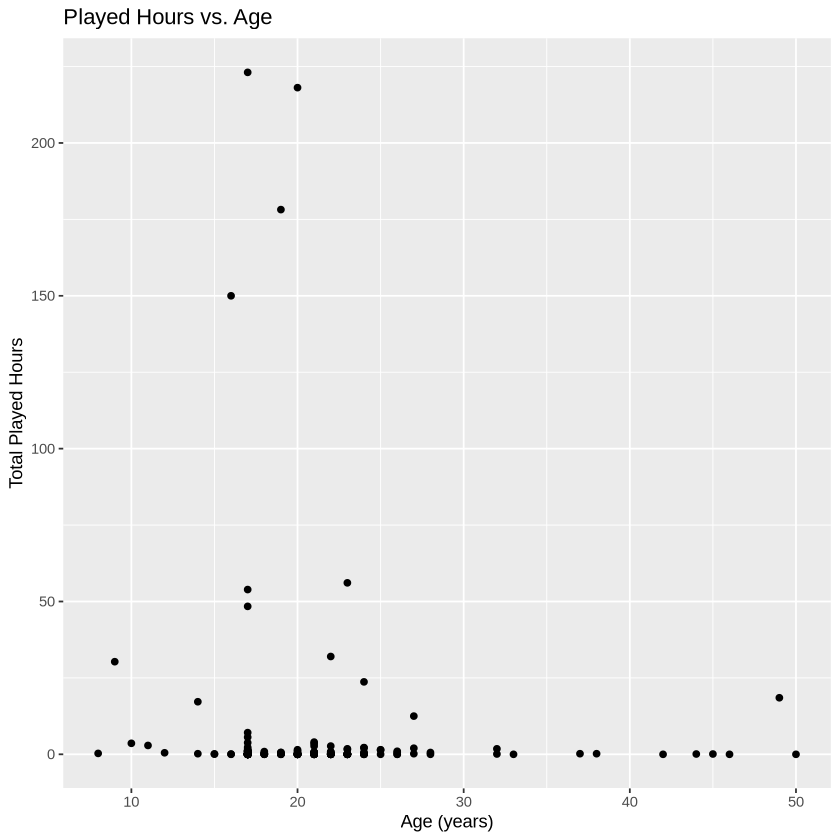

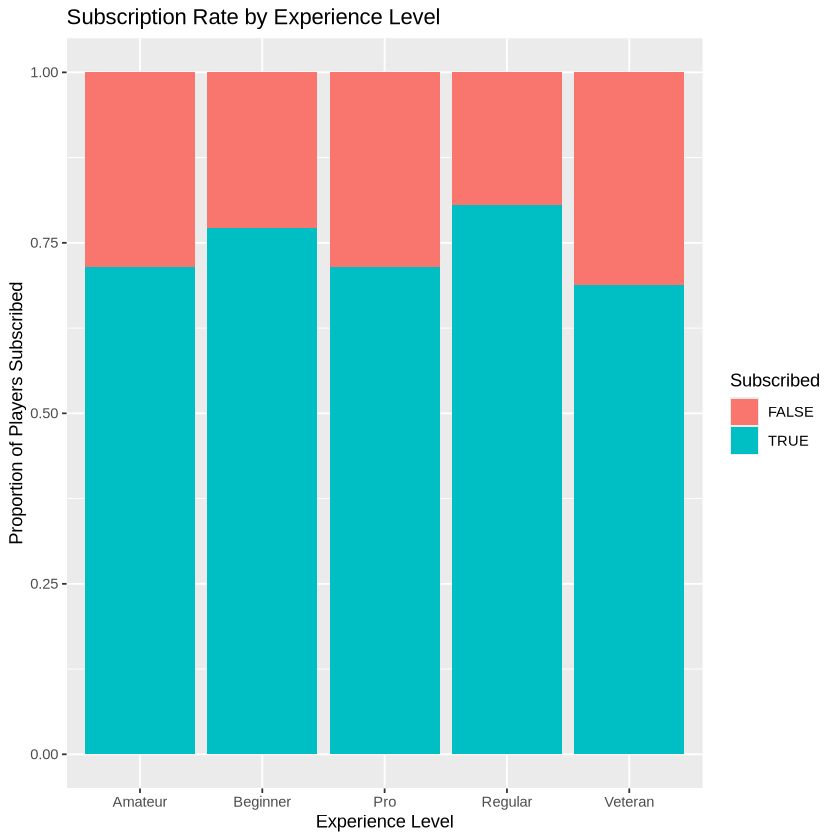

In [6]:
#Loading dataset into R
url_players <- "https://raw.github.students.cs.ubc.ca/fpettit/Project-Planning-Stage/main/players.csv?token=GHSAT0AAAAAAAAAIIVFBWAXAYW34RTD6QDGZ67RXZA"
players_data <- read_csv(url_players)

#Tidying data
players_clean <- players_data |> 
            select(experience, subscribe, played_hours, Age) |> 
            mutate(experience = as.factor(experience),)

#Computing mean value for each quantitative variable in the players.csv data set
summary_mean_played_hours <- players_clean |> 
                            summarize(mean = mean(played_hours, na.rm = TRUE))

summary_mean_age <- players_clean |> 
                          summarize(mean = mean(Age, na.rm = TRUE))

#Reporting mean values in a table format.
summary_mean_played_hours
summary_mean_age

#Exploratory visualizations
age_hours_plot <- ggplot(players_clean, aes(x = Age, y = played_hours)) +
                  geom_point() +
                  labs(title = "Played Hours vs. Age", x = "Age (years)", y = "Total Played Hours")
age_sub_plot <- ggplot(players_clean, aes(x = experience, fill = subscribe)) +
                geom_bar(position = "fill") +
                labs(title = "Subscription Rate by Experience Level", x = "Experience Level", y = "Proportion of Players Subscribed", fill = "Subscribed")

age_hours_plot
age_sub_plot

# **(4) Methods and Plan**

### **Chosen Method:**
K-Nearest Neighbors Classification  

### **Why is this Method Appropriate?**
- `subscribe` has two possible values (`TRUE` or `FALSE`), so we need a classification method.  
- Classification works best because it is designed to predict categories.  
- A method like linear regression would not work well because it predicts continuous values, not categories.   
- It does not assume a fixed pattern, which makes it flexible for different player behaviors.  
- It is simple to understand and does not require complicated math.  

### **Which assumptions are required, if any, to apply the method selected?**
- `played_hours` needs to be standardized so that large numbers don’t overpower smaller ones.  
- The right K-value is important. Too small may lead to mistakes, and too big may be too general.     

### **What are the potential limitations or weaknesses of the method selected?**
- Can be slow if there are too many players because the model compares all of them.   
- Outliers might make predictions less accurate.  

### **How are you going to compare and select the model?**
I will compare different versions of the model using these steps:  

1. **Accuracy Score**:  
   - Measures how many predictions were correct.  
   - A higher accuracy means a better model.  

2. **Confusion Matrix**:  
   - Shows where the model made mistakes (e.g., predicting a player will subscribe when they won’t).  
   - Helps find false positives and false negatives.  

3. **Finding the Best K-Value**:  
   - Instead of guessing `K`, I will test different K-values using cross-validation.  
   - The model will check multiple values of `K` (e.g., 1 to 20) and choose the one with the highest accuracy.  
   - This ensures we don’t overfit or underfit the model.  

### **Data Processing Plan**
1. Remove any missing values in `played_hours` and `experience`.  
2. Standardize `played_hours`: Scale and center `played_hours` so it does not dominate the model.  
3. Convert `experience` into numeric values (Pro = 1, Veteran = 2, etc.).  
4. Split the dataset:  
   - 80% for training (used to train the model).  
   - 20% for testing (used to evaluate how well the model works).  
5. Train the K-NN model using `subscribe ~ experience + played_hours`.  
6. Find the best K-value by using cross-validation to test different values of K (e.g., from 1 to 20) and then choosing the K that gives the highest accuracy.  
7. Train the final model using the best K-value and evaluate performance.  